# Q1.-Baseball Wins Prediction.

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

In [2]:
df =pd. read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


our traget variable is wins.

In [4]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [5]:
# checking rows and columns
df.shape

(30, 17)

In this dataset we have 30 raws and 17 columns.

In [6]:
# checking null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No missing or null values.

In [7]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [9]:
#cheking duplicate values.
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

No duplicate values.

# EDA

### Visualization

1.2007863569707353
3.860870067166195


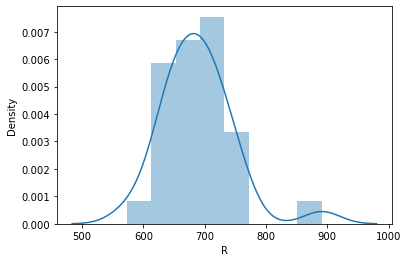

In [10]:
sns.distplot(df['R'])
print(df['R'].skew())
print(df['R'].kurt())
            

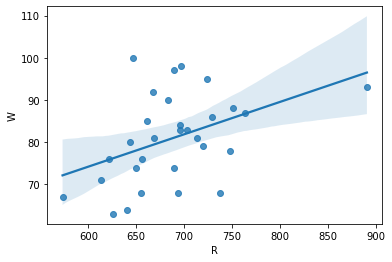

In [11]:
sns.regplot(x = 'R', y = 'W',data = df)

plt.show()

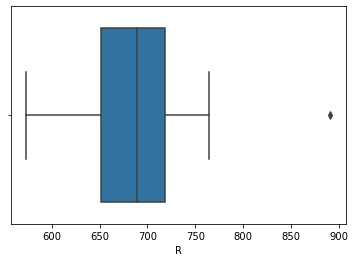

In [12]:
sns.boxplot(df['R'])

plt.show()

0.18343655908507983
-0.7720788412624229


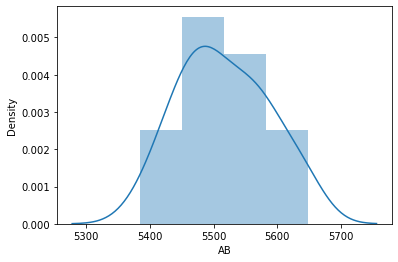

In [13]:
sns.distplot(df['AB'])

print(df['AB'].skew())
print(df['AB'].kurt())

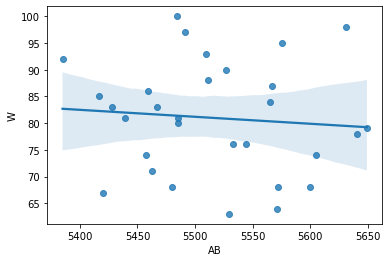

In [14]:
sns.regplot(x = 'AB',y = 'W',data=df)

plt.show()

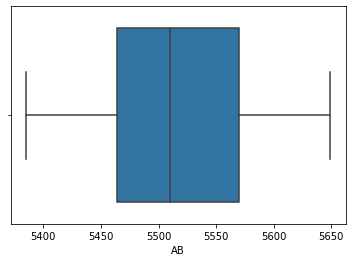

In [15]:
sns.boxplot(df['AB'])

plt.show()

 in this upper Analsis At balls is very weekly coorelated to win with no outliers.

0.6702537173217267
-0.8902363172360914


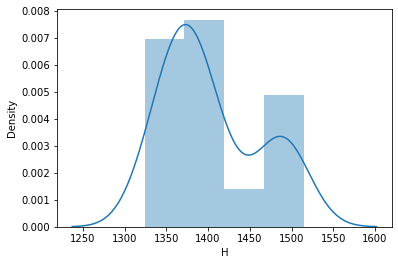

In [16]:
sns.distplot(df['H'])

print(df['H'].skew())
print(df['H'].kurt())

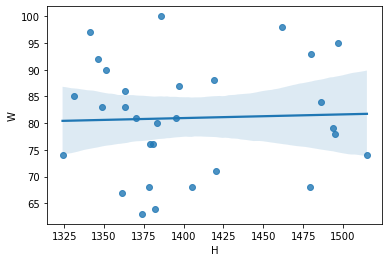

In [17]:
sns.regplot(x = 'H',y = 'W',data =df)

plt.show()

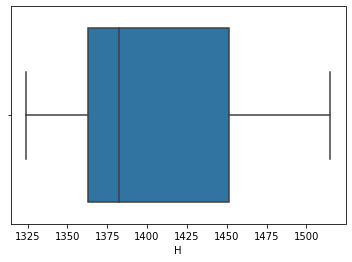

In [18]:
sns.boxplot(df['H'])

plt.show()           

Here we can see  there is also very week coorecation with H(Hits) and W(wins) with no outliers.

-0.23064991757259148
-0.4401847497142919


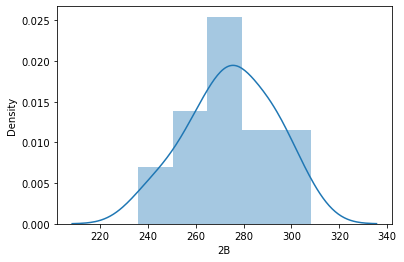

In [19]:
sns.distplot(df['2B'])

print(df['2B'].skew())
print(df['2B'].kurt())

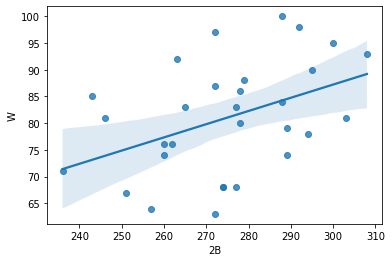

In [20]:
sns.regplot(x = '2B',y = 'W',data =df)

plt.show()

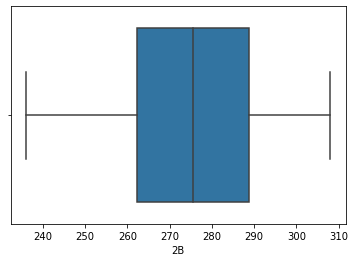

In [21]:
sns.boxplot(df['2B'])

plt.show()

Doubles(2B) is linearly related with wins,
with no outliers,and data is left-skewed.

0.129502450836424
-0.9849656782339742


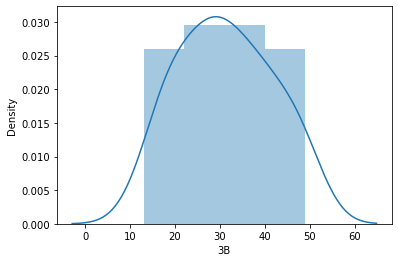

In [22]:
sns.distplot(df['3B'])

print(df['3B'].skew())
print(df['3B'].kurt())

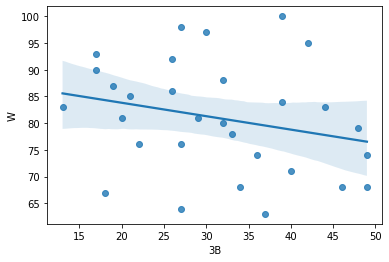

In [23]:
sns.regplot(x = '3B',y = 'W',data = df)

plt.show()

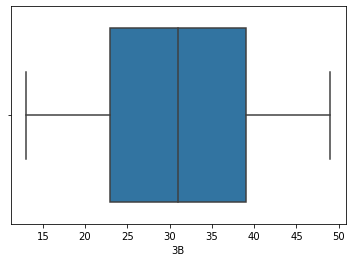

In [24]:
sns.boxplot(df['3B'])

plt.show()

Triple(3B) has very week -ve correlation to win(W)
No outliers are present.


0.5164407366297173
0.01680622469888915


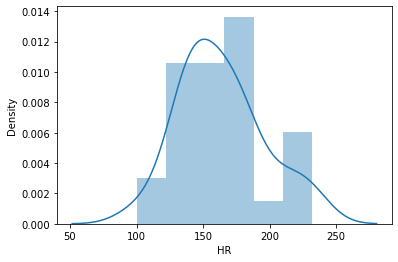

In [25]:
sns.distplot(df['HR'])

print(df['HR'].skew())
print(df['HR'].kurt())

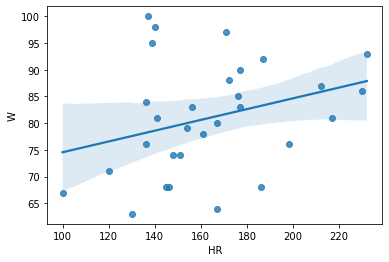

In [26]:
sns.regplot(x = 'HR',y = 'W',data=df)

plt.show()

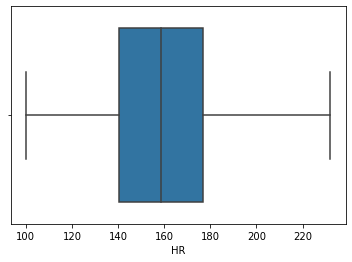

In [27]:
sns.boxplot(df['HR'])

plt.show()

0.15849848440330838
-0.7982719771168036


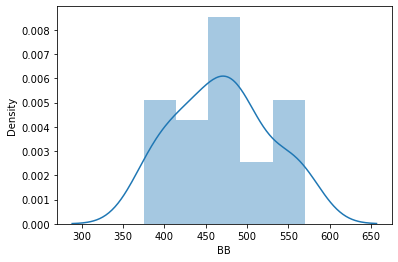

In [28]:
sns.distplot(df['BB'])

print(df['BB'].skew())
print(df['BB'].kurt())

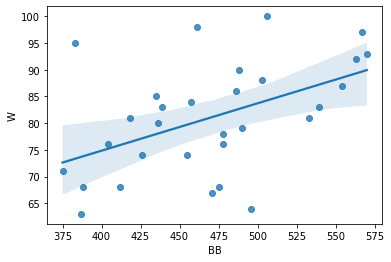

In [29]:
sns.regplot(x = 'BB', y = 'W',data = df)

plt.show()

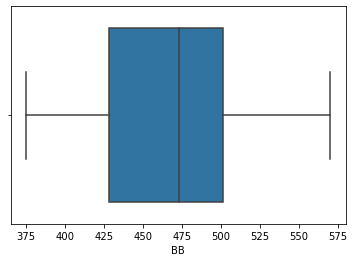

In [30]:
sns.boxplot(df['BB'])

plt.show()

walk (BB)is highly correlated to win with no outliers.

-0.1560654813644833
1.4017053602417078


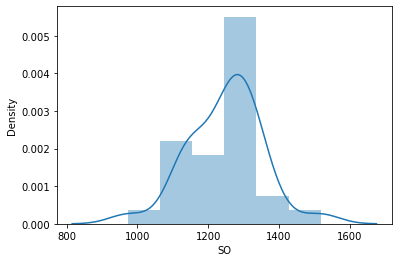

In [31]:
sns.distplot(df['SO'])

print(df['SO'].skew())
print(df['SO'].kurt())

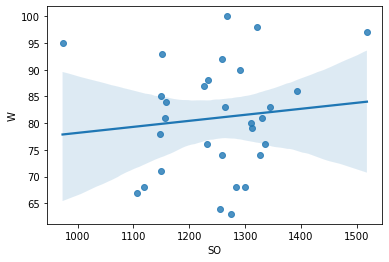

In [32]:
sns.regplot(x = 'SO', y = 'W',data =df)
plt.show()

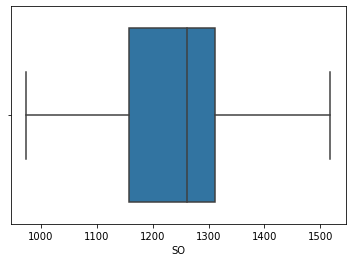

In [33]:
sns.boxplot(df['SO'])

plt.show()

0.4798928679573835
-0.0712468662194099


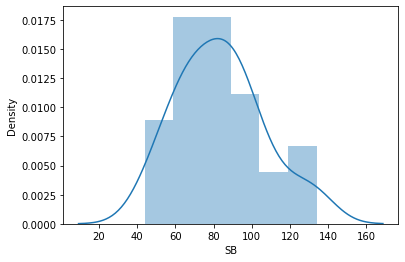

In [34]:
sns.distplot(df['SB'])

print(df['SB'].skew())
print(df['SB'].kurt())

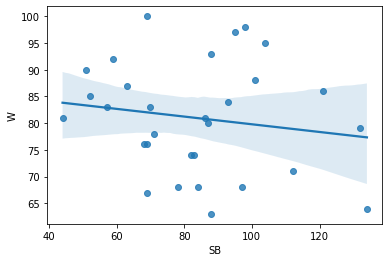

In [35]:
sns.regplot(x = 'SB', y = 'W',data = df)
plt.show()

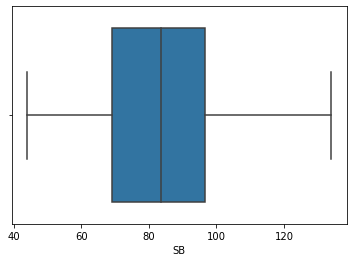

In [36]:
sns.boxplot(df['SB'])

plt.show()

0.04573397531336112
-0.12256988166567684


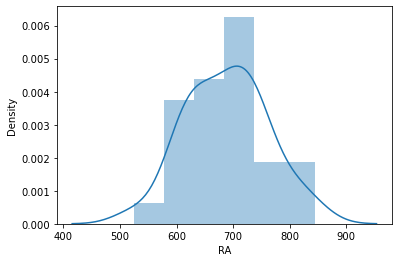

In [37]:
sns.distplot(df['RA'])

print(df['RA'].skew())
print(df['RA'].kurt())

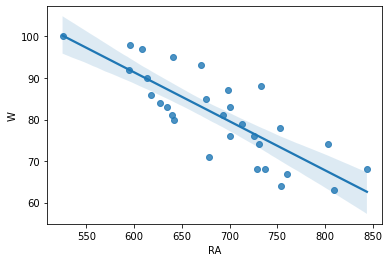

In [38]:
sns.regplot(x = 'RA',y = 'W',data = df)
plt.show()

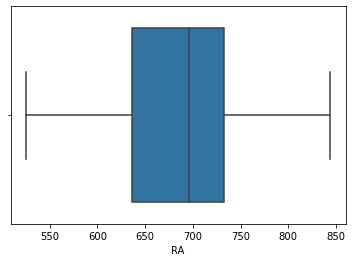

In [39]:
sns.boxplot(df['RA'])

plt.show()

In [40]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


0.05870979570981254
0.17598784233737863


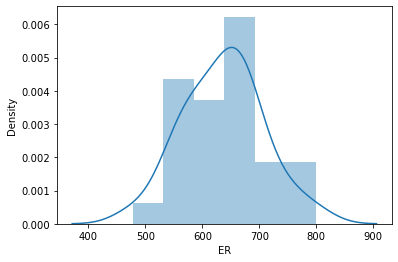

In [41]:
sns.distplot(df['ER'])

print(df['ER'].skew())
print(df['ER'].kurt())

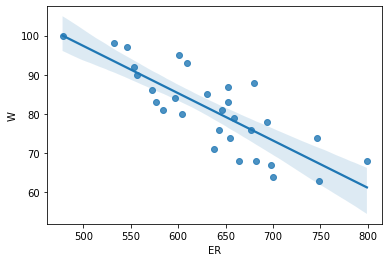

In [42]:
sns.regplot(x = 'ER', y = 'W',data = df)

plt.show()

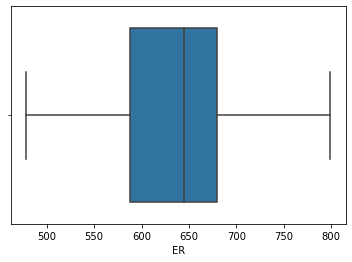

In [43]:
sns.boxplot(df['ER'])
plt.show()

Runs(ER)  Allowed is highly correlated to win with no outliers.

0.053331339494040286
0.3417656314028794


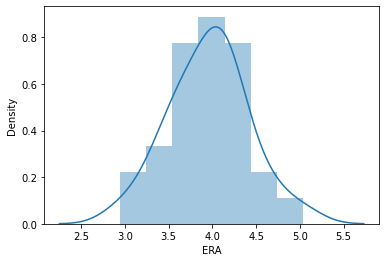

In [44]:
sns.distplot(df['ERA'])

print(df['ERA'].skew())
print(df['ERA'].kurt())

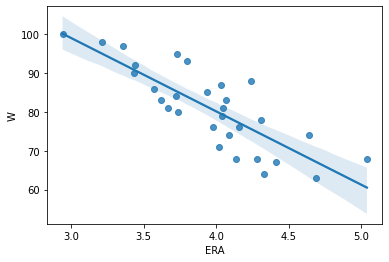

In [45]:
sns.regplot(x = 'ERA', y = 'W',data = df)

plt.show()

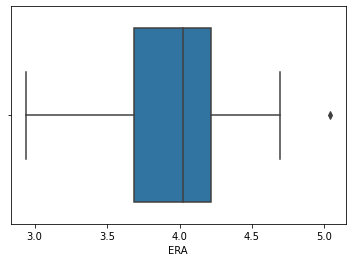

In [46]:
sns.boxplot(df['ERA'])

plt.show()

Earned Runs (RA)ae highlyy correlated to win with no outliers.

0.7368452725826206
0.07797548907189134


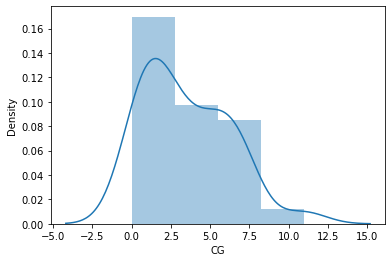

In [47]:
sns.distplot(df['CG'])

print(df['CG'].skew())
print(df['CG'].kurt())

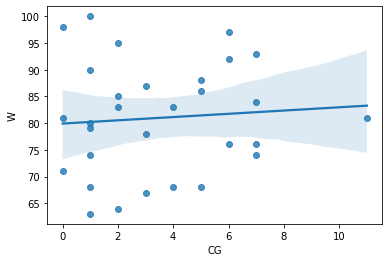

In [48]:
sns.regplot(x = 'CG', y = 'W',data = df)

plt.show()

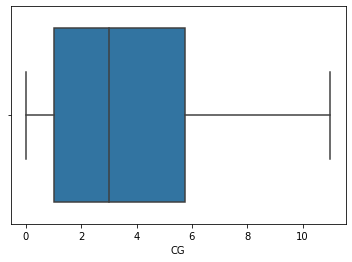

In [49]:
sns.boxplot(df['CG'])

plt.show()

0.5657904298216165
0.7305764335020348


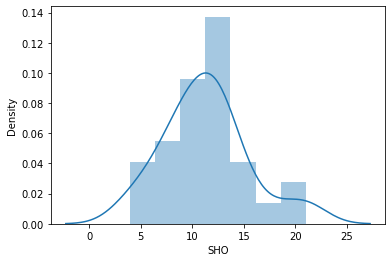

In [50]:
sns.distplot(df['SHO'])

print(df['SHO'].skew())
print(df['SHO'].kurt())

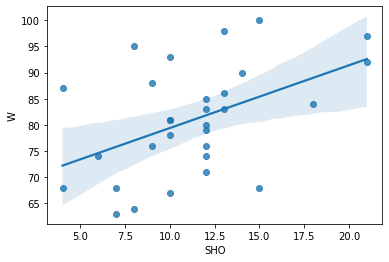

In [51]:
sns.regplot(x = 'SHO', y = 'W',data = df)

plt.show()

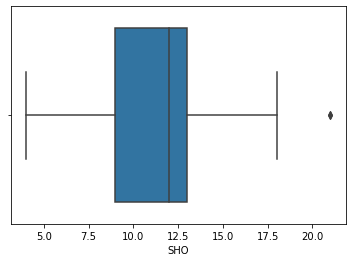

In [52]:
sns.boxplot(df['SHO'])

plt.show()

0.6575235461553925
0.39127553300990847


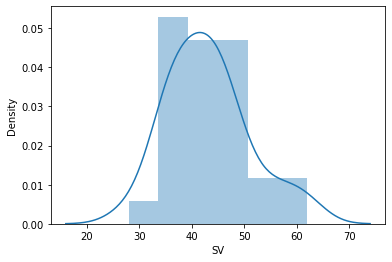

In [53]:
sns.distplot(df['SV'])

print(df['SV'].skew())
print(df['SV'].kurt())

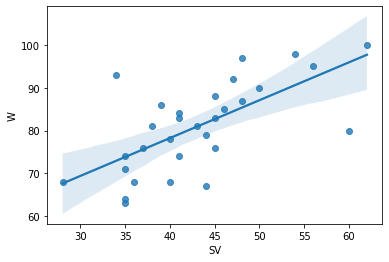

In [54]:
sns.regplot(x = 'SV', y = 'W',data = df)

plt.show()

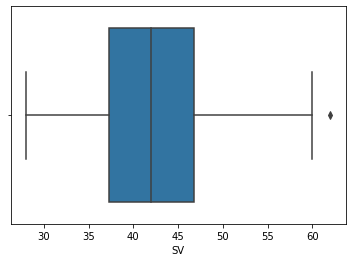

In [55]:
sns.boxplot(df['SV'])

plt.show()

0.8901318267689016
0.014387954494919697


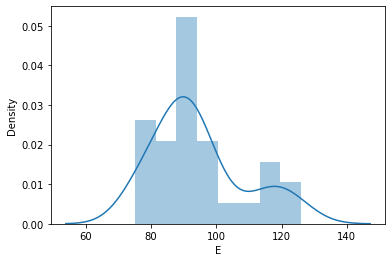

In [56]:
sns.distplot(df['E'])

print(df['E'].skew())
print(df['E'].kurt())

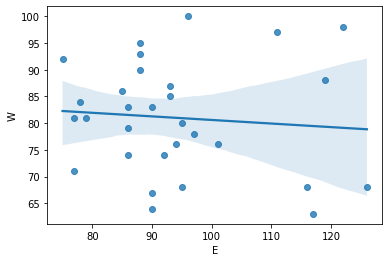

In [57]:
sns.regplot(x = 'E', y = 'W',data = df)

plt.show()

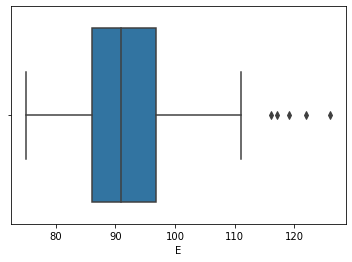

In [58]:
sns.boxplot(df['E'])

plt.show()

# Conclusion:

### Let's handel the skew

In [59]:
df['E'] =np.sqrt(df['E'])
df['SHO'] = np.sqrt(df['SHO'])
df['CG'] = np.sqrt(df['CG'])
df['HR'] = np.sqrt(df['HR'])
df['SO'] = np.sqrt(df['SO'])
df['2B'] =np.sqrt(df['2B'])

### lets handel Outliers.

In [60]:
# finding IQR
percentile25 = df['E'].quantile(0.25)
percentile75 = df['E'].quantile(0.75)

In [61]:
percentile25

9.273618495495704

In [62]:
iqr = percentile75 - percentile25

In [63]:
iqr

0.5625145986345519

In [64]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [65]:
print('Upper limit',upper_limit)
print('Lower limit',lower_limit)

Upper limit 10.679904992082083
Lower limit 8.429846597543875


### Triming

In [66]:
df = df[df['E']< upper_limit]

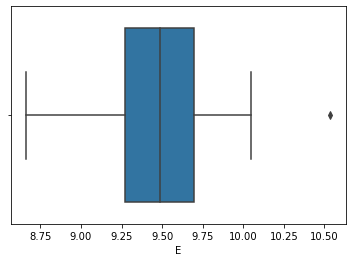

In [67]:
# new boxplot of E  after removing outliers
sns.boxplot(df['E'])

plt.show()

In [68]:
df.shape

(25, 17)

# Now Let's create Heatmap for more visualization of correlation.

<AxesSubplot:>

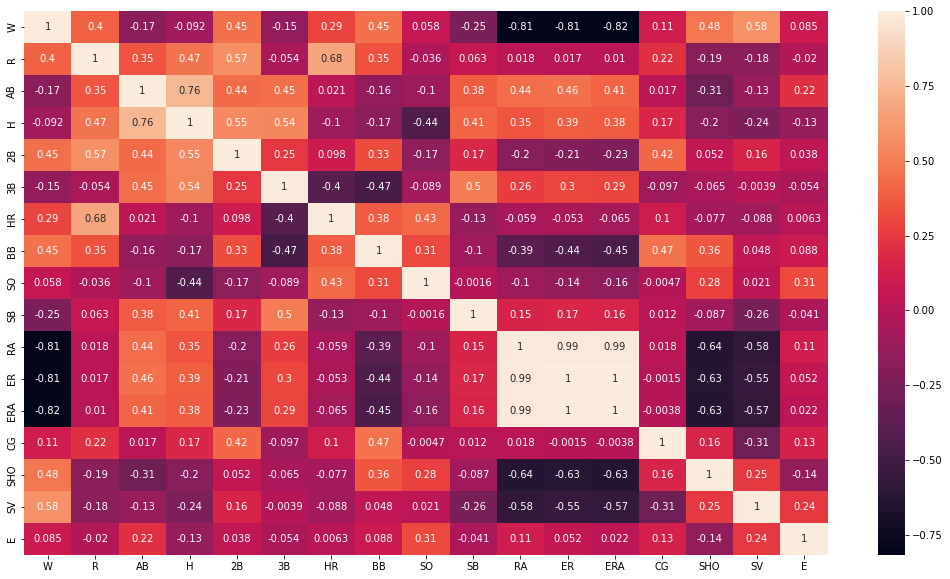

In [69]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)

In [70]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.399280,-0.174351,-0.092160,0.452126,-0.154153,0.292555,0.453453,0.058218,-0.253538,-0.809896,-0.809038,-0.817296,0.111496,0.477546,0.583096,0.085279
R,0.399280,1.000000,0.351357,0.474637,0.574483,-0.054376,0.675363,0.345119,-0.035927,0.063013,0.018163,0.016869,0.010035,0.218166,-0.186462,-0.182687,-0.020200
AB,-0.174351,0.351357,1.000000,0.757412,0.437372,0.452995,0.021233,-0.155718,-0.100924,0.382079,0.439244,0.456449,0.408038,0.017138,-0.311122,-0.125326,0.218636
H,-0.092160,0.474637,0.757412,1.000000,0.547980,0.544067,-0.099605,-0.174812,-0.440811,0.406601,0.347743,0.387976,0.375859,0.165660,-0.199443,-0.240114,-0.134090
2B,0.452126,0.574483,0.437372,0.547980,1.000000,0.245466,0.097816,0.325576,-0.170054,0.173978,-0.200925,-0.212641,-0.231690,0.420250,0.051617,0.155078,0.038254
3B,-0.154153,-0.054376,0.452995,0.544067,0.245466,1.000000,-0.400001,-0.473665,-0.089090,0.502175,0.262563,0.302712,0.292288,-0.096570,-0.064793,-0.003937,-0.053842
HR,0.292555,0.675363,0.021233,-0.099605,0.097816,-0.400001,1.000000,0.378564,0.429937,-0.129217,-0.059113,-0.052530,-0.065218,0.102889,-0.077235,-0.087581,0.006275
BB,0.453453,0.345119,-0.155718,-0.174812,0.325576,-0.473665,0.378564,1.000000,0.305544,-0.104657,-0.388462,-0.439222,-0.452248,0.465374,0.355800,0.048211,0.088475
SO,0.058218,-0.035927,-0.100924,-0.440811,-0.170054,-0.089090,0.429937,0.305544,1.000000,-0.001567,-0.103940,-0.142446,-0.162773,-0.004669,0.279427,0.021355,0.311636
SB,-0.253538,0.063013,0.382079,0.406601,0.173978,0.502175,-0.129217,-0.104657,-0.001567,1.000000,0.151119,0.168476,0.155404,0.012323,-0.087099,-0.264448,-0.040832


### Here we can see all the  strong correlation and week correlatios as per our upper observations.

# Saperating The Features And Labels:

In [71]:
x = df.drop(['W'],axis=1)
y = df['W']

# Using StandardScaler:

In [72]:
# using this methd for biasness
Scaler =StandardScaler()
x = pd.DataFrame(Scaler.fit_transform(x),columns = x.columns)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.580480,0.941114,1.575831,1.345149,1.069913,-0.847971,-1.571891,-2.688883,0.903891,-0.586300,-0.440977,-0.453037,-0.388601,-0.811612,1.678744,-0.126968
1,0.116626,-0.610173,-0.897896,0.177515,1.256309,-0.294398,-0.598153,0.169987,-0.508439,0.263202,0.330584,0.336064,-0.388601,0.204837,0.189536,-0.378495
2,-0.330661,-1.012358,-0.129035,1.494101,-0.141661,-0.781150,1.036335,-0.838575,0.156187,-0.600699,-0.693218,-0.592290,1.926901,-0.277782,-0.758143,-1.282719
3,-1.109273,0.337836,-0.363036,-0.717019,-0.328057,-0.949110,-1.206739,-0.136349,-0.591517,0.277600,0.182207,0.127185,1.110354,-0.537265,-0.893525,1.442642
4,0.000663,1.372027,1.876689,0.792519,1.722299,-0.453939,-0.319942,0.123831,0.031570,1.746231,1.710491,1.658969,1.110354,0.204837,-1.164290,-0.378495
5,3.347035,-0.006895,1.291686,1.740724,-1.260037,1.873142,1.679698,-0.896484,0.239265,-0.168749,-0.322275,-0.290575,1.110354,-0.277782,-1.299673,-0.126968
6,1.243127,0.826204,-0.095606,-0.082662,-1.073641,1.342374,1.401487,-0.173759,-0.799213,0.234405,0.315746,0.243229,-0.001748,-2.136274,0.595683,0.489618
7,0.398251,-0.351625,-0.546894,-1.475902,-0.980443,1.477334,-0.963305,0.779878,-1.588456,0.162413,0.226720,0.289647,-2.109897,-0.277782,-0.081230,-1.548363
8,-0.744816,-0.351625,-0.329607,0.229268,0.137933,0.047826,-0.650318,0.590404,0.197726,-0.571902,-0.396464,-0.429828,-0.892757,0.204837,2.220274,0.731598
9,0.978068,1.874759,1.542402,1.044995,0.231131,-0.137395,0.079986,-0.925495,-0.466900,1.026314,0.938930,0.893077,-0.001748,-0.277782,-0.487377,0.971044


In [73]:
# import necessoy librories:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


In [74]:
#finding best random state
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred= lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"on Random_state",maxRS)

Maximum r2 score is  0.7309549305591696 on Random_state 173


In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state = maxRS)

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Ridge

In [77]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 0.7309549305591696
R2_score on training Data: 100.0
Mean Absolute Error:- 4.22030880727519
Mean Squared Error:- 26.194059807590854
Root Mean Squared Error:- 5.11801326762552


In [78]:
DE= DecisionTreeRegressor()
DE.fit(x_train,y_train)
pred_DE=DE.predict(x_test)
pred_train=DE.predict(x_train)
print('R2_score:',r2_score(y_test,pred_DE))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_DE))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_DE))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test,pred_DE)))

R2_score: -0.5881880917990692
R2_score on training Data: 100.0
Mean Absolute Error:- 9.125
Mean Squared Error:- 154.625
Root Mean Squared Error:- 12.434830115445887


In [79]:
RF= RandomForestRegressor()
RF.fit(x_train,y_train)
pred_RF=RF.predict(x_test)
pred_train=RF.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RF))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_RF))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_RF))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test,pred_RF)))

R2_score: 0.41570508746589674
R2_score on training Data: 90.6853286364432
Mean Absolute Error:- 6.151249999999999
Mean Squared Error:- 56.88658749999996
Root Mean Squared Error:- 7.542319769142645


In [80]:
KN=  KNN()
KN.fit(x_train,y_train)
pred_KN=KN.predict(x_test)
pred_train=KN.predict(x_train)
print('R2_score:',r2_score(y_test,pred_KN))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_KN))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_KN))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test,pred_KN)))

R2_score: 0.5671192424971918
R2_score on training Data: 50.52354279712935
Mean Absolute Error:- 4.8249999999999975
Mean Squared Error:- 42.14499999999996
Root Mean Squared Error:- 6.491918052471084


In [81]:
RD=  Ridge()
RD.fit(x_train,y_train)
pred_RD=RD.predict(x_test)
pred_train=RD.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RD))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_RD))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_RD))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test,pred_RD)))

R2_score: 0.6794718045244192
R2_score on training Data: 99.18962644429674
Mean Absolute Error:- 4.581808125550216
Mean Squared Error:- 31.206424781380363
Root Mean Squared Error:- 5.586271098092212


### Cross-val-Score:

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Diffrence between R2 score and cross validation score is-",(r2_score(y_test,pred_LR)-score.mean())*100)

[ 0.49294204 -0.52310462  0.12769976  0.71111657  0.51707631]
0.2651460116507558
Diffrence between R2 score and cross validation score is- 46.58089189084138


In [84]:
score = cross_val_score(RF,x,y)
print(score)
print(score.mean())
print("Diffrence between R2 score and cross validation score is-",(r2_score(y_test,pred_RF)-score.mean())*100)

[ 0.3169712  -1.06214456  0.03210032  0.19170347  0.43267836]
-0.01773824377051949
Diffrence between R2 score and cross validation score is- 43.34433312364162


In [85]:
score = cross_val_score(DE,x,y)
print(score)
print(score.mean())
print("Diffrence between R2 score and cross validation score is-",(r2_score(y_test,pred_DE)-score.mean())*100)

[ 0.1211226  -2.22944297 -0.60506864  0.48367347  0.09492925]
-0.4269572588501037
Diffrence between R2 score and cross validation score is- -16.123083294896546


In [86]:
score = cross_val_score(KN,x,y)
print(score)
print(score.mean())
print("Diffrence between R2 score and cross validation score is-",(r2_score(y_test,pred_KN)-score.mean())*100)

[ 0.21698671 -0.17108753 -0.02925026  0.17012245  0.67830189]
0.17301464893602497
Diffrence between R2 score and cross validation score is- 39.41045935611668


In [87]:
score = cross_val_score(RD,x,y)
print(score)
print(score.mean())
print("Diffrence between R2 score and cross validation score is-",(r2_score(y_test,pred_RD)-score.mean())*100)

[ 0.60222624 -0.08692692  0.42093844  0.88586974  0.93366497]
0.5511544933008581
Diffrence between R2 score and cross validation score is- 12.831731122356116


### Now I am using Ridge model as my best model due to very least difference bitween r2score and cross-val-score.

# Hyper-Parameters-Tunning:

In [88]:
from sklearn.model_selection import GridSearchCV

param = {'alpha':[1.0,.05,.4,2],'fit_intercept':[True,False],
         'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],
         'positive':[False,True],
         'random_state':[1,4,10,20]
        }

In [89]:
gscv = GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [91]:
gscv.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'positive': False,
 'random_state': 20,
 'solver': 'saga'}

In [92]:
Model = Ridge(alpha = 1.0,fit_intercept = True,positive = False,random_state = 20,solver = 'saga')

In [93]:
Model.fit(x_train,y_train)
pred = Model.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred))
print('Mean Squared Error:-',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.6669181901554729
Mean Absolute Error:- 4.696703447918324
Mean Squared Error:- 32.428636830332
Root Mean Squared Error:- 5.694614721851866


# Saving the Model:

In [95]:
# we use joblib methode for save the model
import joblib
joblib.dump(Model,"Baseball case study")

['Baseball case study']

In [96]:
# load the saved model
model = joblib.load("Baseball case study")

#pediction
prediction = model.predict(x_test)
prediction

array([87.32161111, 85.85964652, 69.34687654, 84.4288457 , 85.50781857,
       67.75773917, 75.76196721, 90.29851298])

# Q2.Avocado Project:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

### https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

In [2]:
df =pd.read_csv (r'C:\Users\ADMIN\Downloads\avocado.csv')

In [3]:
# checking the first 5 rows of our dataset
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# checking the rows and columns
df.shape

(18249, 14)

In this data set 18249 rows and 14 coulmns.

In [5]:
# columns in this data set
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
# checking null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values.

In [9]:
# checking duplicate values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18244    False
18245    False
18246    False
18247    False
18248    False
Length: 18249, dtype: bool

No duplicate values.

In [10]:
# drop  unnccesory unnamed column:
df.drop(columns=['Unnamed: 0'],inplace = True)

In [11]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Now its looks better.

In [12]:
# creating get_dummies methode for typ column:
df = pd.get_dummies(data=df, columns=['type'],drop_first=True)

In [13]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year              int64
region           object
type_organic      uint8
dtype: object

In [14]:
# changing the Date in to int
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  year          18249 non-null  int64         
 11  region        18249 non-null  object        
 12  type_organic  18249 non-null  uint8         
dtypes: datetime64[ns](1), float64(9), int64(1), object(1), uint8(1)
memory usage: 1.7+ MB


# Visualization:

# Data Analyst:

Text(0.5, 1.0, 'Distributin of Average price')

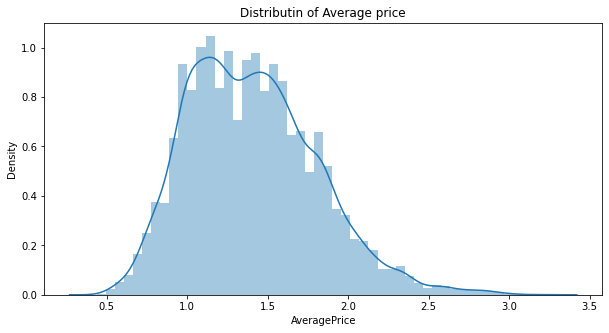

In [16]:
plt.figure(figsize=(10,5))
sns.distplot(df['AveragePrice'])
plt.title('Distributin of Average price')

Most Average pice lies range from 1.0 to 1.7

<AxesSubplot:xlabel='type_organic', ylabel='AveragePrice'>

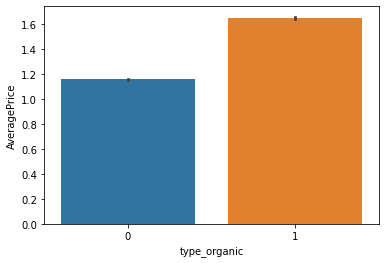

In [17]:
# type vs Average price
sns.barplot(x="type_organic",y = "AveragePrice",data = df)

Here we can see Organic avocados are more expensive than conventional one.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

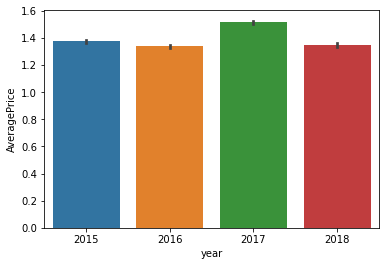

In [18]:
# how Average price varies over year
sns.barplot(x='year',y='AveragePrice',data=df)

here we can notice that in 2017 Average price is higher then other years. 

<AxesSubplot:xlabel='region'>

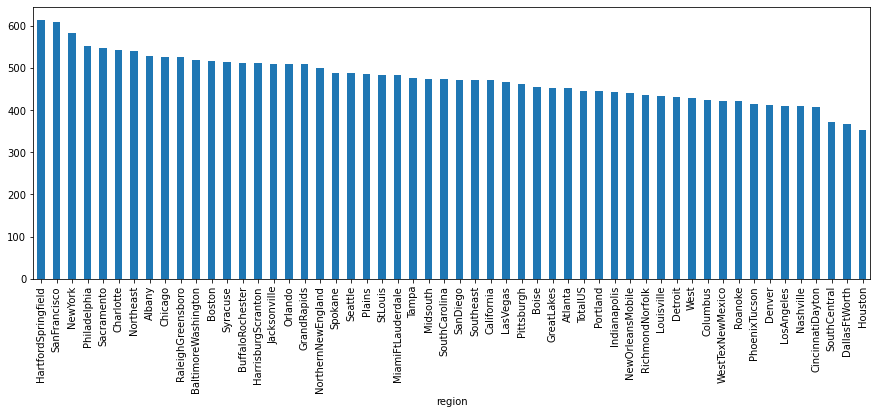

In [19]:
df.groupby('region')['AveragePrice'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(15,5))

Here we can see the highest average price is Hartfodspringfield and cheapest average price found in Houston city.

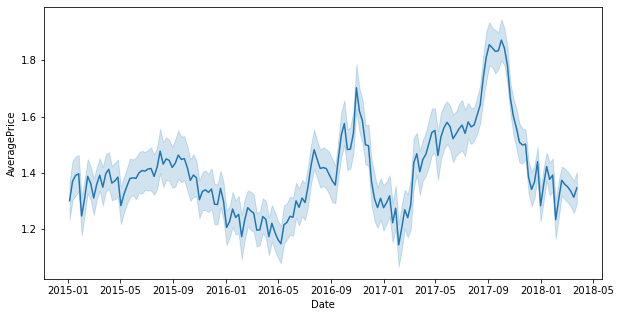

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date',y='AveragePrice',data=df)
plt.show()

Here we can see that AveragePrice of Avocado go higher in 2017-2018-01 and go very lower 2015-2016

Text(0.5, 1.0, 'Distributin of Total Volume')

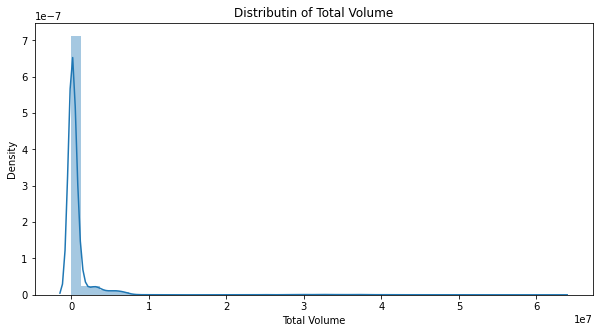

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(df['Total Volume'])
plt.title('Distributin of Total Volume')

Total vlume is highly skewed in this data set and this not looks like a normal distribution.

In [22]:
# hhandale the skewe in this column
df['Total Volume'] =np.sqrt(df['Total Volume'])

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
#lets conver region column in to numerical data by Labelencoder Methode:
le = LabelEncoder()
df['region']=le.fit_transform(df['region'])

In [25]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,2015-12-27,1.33,253.449443,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,0
1,2015-12-20,1.35,234.258362,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,0
2,2015-12-13,0.93,343.831674,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,0
3,2015-12-06,1.08,281.055422,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,0
4,2015-11-29,1.28,225.919455,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,0


### lets check correlations with Heatmap:

<AxesSubplot:>

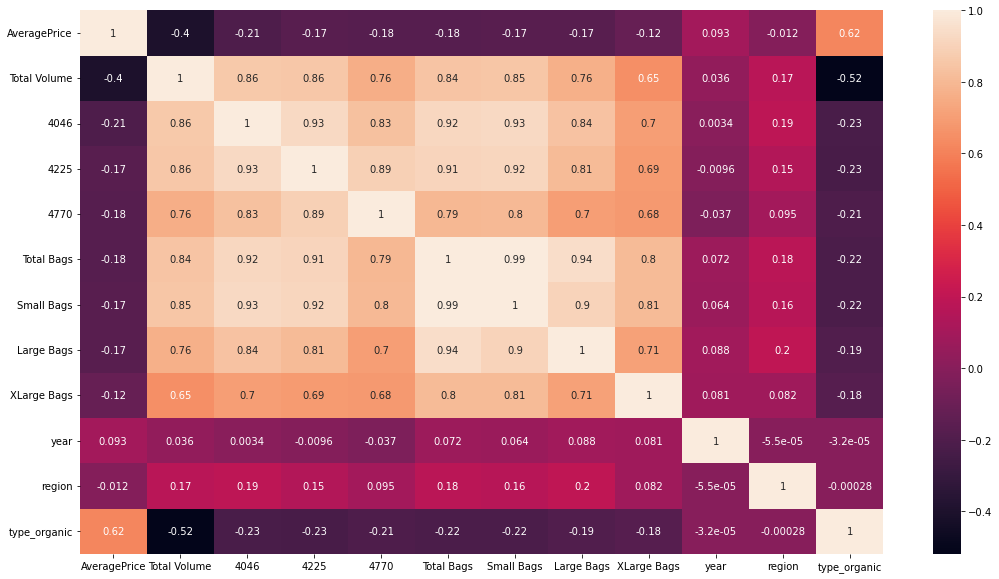

In [26]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)

In [27]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
AveragePrice,1.000000,-0.400856,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,-0.011716,0.615845
Total Volume,-0.400856,1.000000,0.859024,0.855099,0.761710,0.842199,0.847744,0.764898,0.646323,0.035796,0.171710,-0.519232
4046,-0.208317,0.859024,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,0.192073,-0.225819
4225,-0.172928,0.855099,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,0.145726,-0.232289
4770,-0.179446,0.761710,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,0.095252,-0.210027
Total Bags,-0.177088,0.842199,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,0.175256,-0.217788
Small Bags,-0.174730,0.847744,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,0.164702,-0.220535
Large Bags,-0.172940,0.764898,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,0.198768,-0.193177
XLarge Bags,-0.117592,0.646323,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,0.082281,-0.175483
year,0.093197,0.035796,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.000055,-0.000032


<AxesSubplot:>

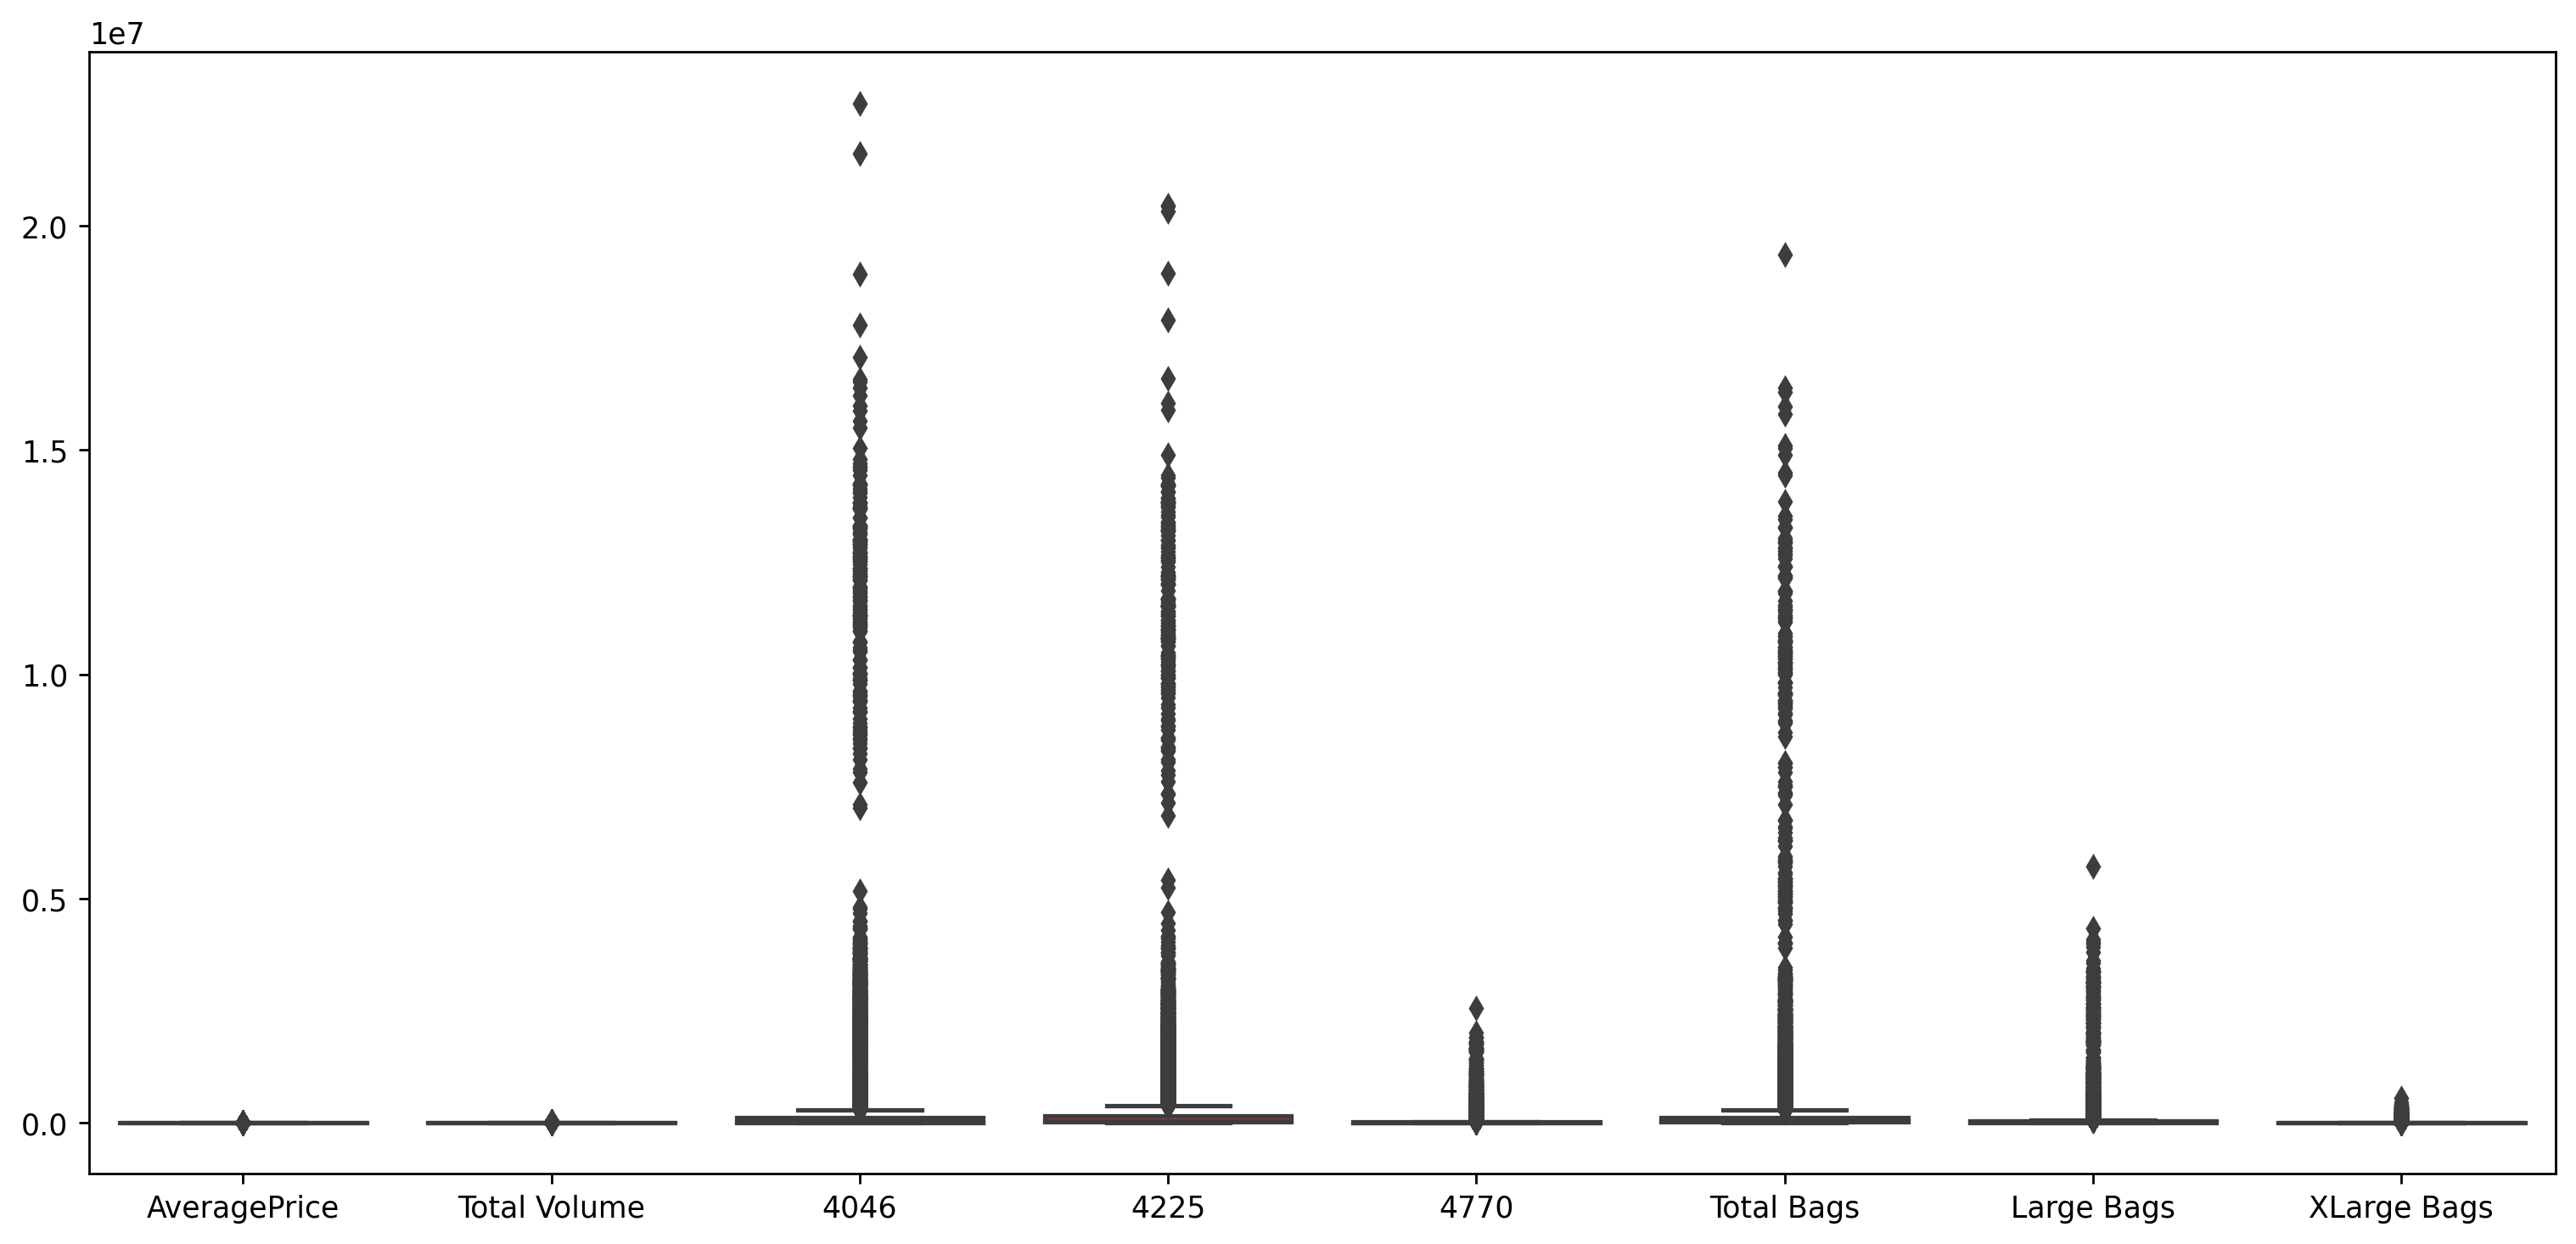

In [28]:
plt.figure(figsize=(15,7),dpi=250)
sns.boxplot(data=df[[
    'AveragePrice',
    'Total Volume',
    '4046',
    '4225',
    '4770',
    'Total Bags',
    'Large Bags',
    'XLarge Bags']])

Clearly The boxplot indicates that all the variables contains outliers.Now we need to variable contains outliers.
we have to handel these outliers.

In [29]:
# i am going to delete date column there is no more use this column:
df.drop(columns=['Date'],inplace=True)

In [30]:
from numpy import percentile

columns = df.columns
for j in columns:
    if isinstance(df[j][0],str):
        continue
    else:
        #defining quartiles
        quartiles = percentile(df[j],[25,75])
        #calculate min/max
        lower_fence = quartiles[0]-(1.5*(quartiles[1]-quartiles[0]))
        
        upper_fence = quartiles[1]+(1.5*(quartiles[1]-quartiles[0]))
        
        df[j] = df[j].apply(lambda x: upper_fence if x > upper_fence else(lower_fence if x< lower_fence else x))

<AxesSubplot:>

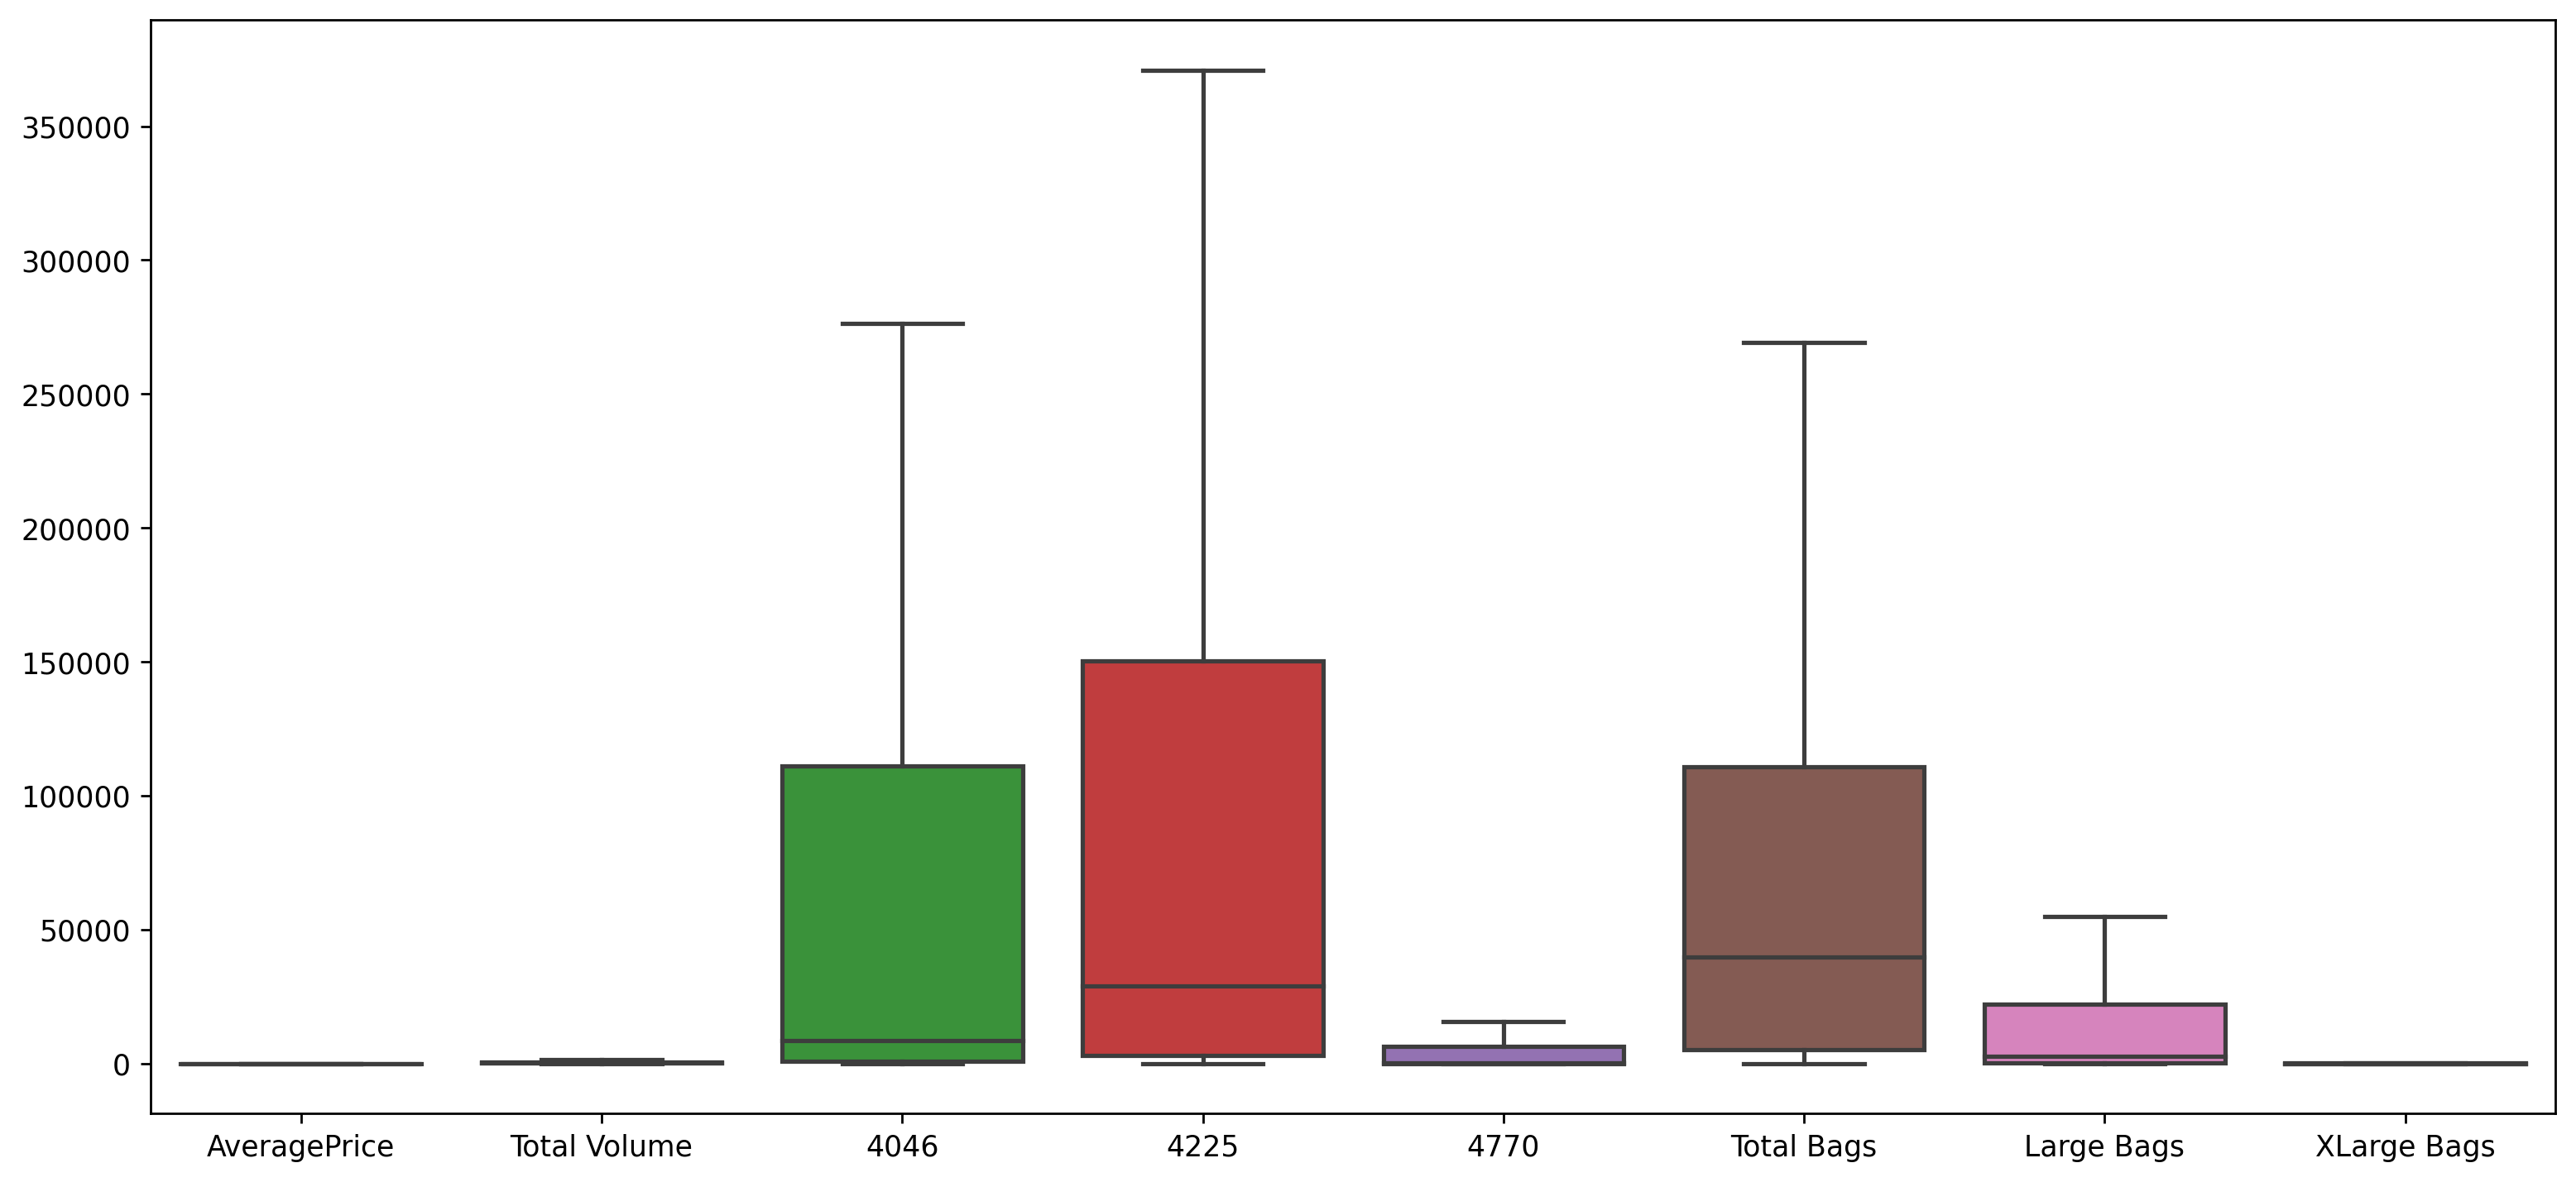

In [31]:
# lets check it again with boxplot:
plt.figure(figsize=(15,7),dpi=250)
sns.boxplot(data=df[[
    'AveragePrice',
    'Total Volume',
    '4046',
    '4225',
    '4770',
    'Total Bags',
    'Large Bags',
    'XLarge Bags']])

Now we can see our data is free from outliers.

In [32]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,1.33,253.449443,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,0
1,1.35,234.258362,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,0
2,0.93,343.831674,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,0
3,1.08,281.055422,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,0
4,1.28,225.919455,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   year          18249 non-null  int64  
 10  region        18249 non-null  int64  
 11  type_organic  18249 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 1.7 MB


In [34]:
df.shape

(18249, 12)

### Seprating the features and Labels:

In [35]:
x =  df.drop(['region'],axis=1)
y = df['region']

In [36]:
y.value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64

it loks like balanced

### Using StandardScaler:

In [37]:
# using this methd for biasness
Scaler =StandardScaler()
x = pd.DataFrame(Scaler.fit_transform(x),columns = x.columns)
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_organic
0,-0.186305,-0.477176,-0.690114,-0.332446,-0.646057,-0.744399,-0.701162,-0.703685,-0.600511,-1.221282,-0.999836
1,-0.135726,-0.521490,-0.693767,-0.406178,-0.644361,-0.735706,-0.689621,-0.703476,-0.600511,-1.221282,-0.999836
2,-1.197899,-0.268479,-0.692553,0.078387,-0.632323,-0.750328,-0.709217,-0.703196,-0.600511,-1.221282,-0.999836
3,-0.818551,-0.413433,-0.689155,-0.200835,-0.641984,-0.775421,-0.743145,-0.701682,-0.600511,-1.221282,-0.999836
4,-0.312755,-0.540745,-0.691074,-0.412191,-0.641450,-0.771413,-0.738713,-0.698521,-0.600511,-1.221282,-0.999836
...,...,...,...,...,...,...,...,...,...,...,...
18244,0.572389,-0.760679,-0.679935,-0.729991,-0.654090,-0.692780,-0.637130,-0.686942,-0.600511,1.970504,1.000164
18245,0.774708,-0.790288,-0.688553,-0.715702,-0.654090,-0.738294,-0.696336,-0.692236,-0.600511,1.970504,1.000164
18246,1.179345,-0.791479,-0.688551,-0.723054,-0.532670,-0.736904,-0.690428,-0.706204,-0.600511,1.970504,1.000164
18247,1.331084,-0.768463,-0.685168,-0.719086,-0.532826,-0.719968,-0.667936,-0.705824,-0.600511,1.970504,1.000164


# Testing and spliting

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state =41)

In [39]:
from sklearn.metrics  import confusion_matrix,classification_report,accuracy_score

In [40]:
def metric_score(clf, x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n==========Train Result=========")
        
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100: .2f}%")
        
    
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n=========Train Result========")
        
        print(f"Accuracy Score: {accuracy_score(y_test, pred)*100: .2f}%")
        
        print('\n \n Test Cassification Report \n',classification_report(y_test,pred,digits=2))

### Model Training:

### DecisionTreeClassifier:

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
Dec = DecisionTreeClassifier()
Dec.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
metric_score(Dec,x_train,x_test,y_train,y_test,train=True)

metric_score(Dec,x_train,x_test,y_train,y_test,train=False)


==========Train Result=========
Accuracy Score:  98.17%

=========Train Result========
Accuracy Score:  74.69%

 
 Test Cassification Report 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        78
           1       0.76      0.68      0.72        95
           2       0.84      0.90      0.87        80
           3       0.72      0.86      0.78        78
           4       0.91      0.80      0.85        93
           5       0.80      0.74      0.77        87
           6       0.69      0.69      0.69        90
           7       0.78      0.88      0.83        91
           8       0.85      0.78      0.81        73
           9       0.77      0.87      0.81        83
          10       0.73      0.70      0.71        89
          11       0.81      0.85      0.83        94
          12       0.85      0.78      0.82        82
          13       0.69      0.70      0.70        77
          14       0.79      0.76      0.77  

### RandomForestClassifier Model:

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
RFR = RandomForestClassifier()
RFR.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
metric_score(RFR,x_train,x_test,y_train,y_test,train=True)
metric_score(RFR,x_train,x_test,y_train,y_test,train=False)


==========Train Result=========
Accuracy Score:  98.17%

=========Train Result========
Accuracy Score:  86.43%

 
 Test Cassification Report 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        78
           1       0.83      0.84      0.84        95
           2       0.89      0.99      0.93        80
           3       0.88      0.90      0.89        78
           4       0.94      0.97      0.95        93
           5       0.86      0.82      0.84        87
           6       0.80      0.79      0.79        90
           7       0.89      0.87      0.88        91
           8       0.96      0.95      0.95        73
           9       0.90      0.86      0.88        83
          10       0.84      0.85      0.84        89
          11       0.94      0.95      0.94        94
          12       1.00      0.93      0.96        82
          13       0.88      0.83      0.85        77
          14       0.92      0.91      0.92  

### AdaBoostClassifier Model:

In [47]:
from sklearn.ensemble import AdaBoostClassifier

In [48]:
Adb = AdaBoostClassifier()
Adb.fit(x_train,y_train)

AdaBoostClassifier()

In [49]:
metric_score(Adb,x_train,x_test,y_train,y_test,train=True)
metric_score(Adb,x_train,x_test,y_train,y_test,train=False)


==========Train Result=========
Accuracy Score:  7.44%

=========Train Result========
Accuracy Score:  6.33%

 
 Test Cassification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.00      0.00      0.00        95
           2       0.00      0.00      0.00        80
           3       1.00      0.01      0.03        78
           4       0.04      0.01      0.02        93
           5       0.00      0.00      0.00        87
           6       0.00      0.00      0.00        90
           7       0.00      0.00      0.00        91
           8       0.05      0.81      0.09        73
           9       0.00      0.00      0.00        83
          10       0.00      0.00      0.00        89
          11       0.06      0.32      0.10        94
          12       0.75      0.04      0.07        82
          13       0.00      0.00      0.00        77
          14       0.00      0.00      0.00    

### XGBoostClassifier Model:

In [50]:
from xgboost import XGBClassifier

In [51]:
XGB = XGBClassifier()
XGB.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [52]:
metric_score(XGB,x_train,x_test,y_train,y_test,train=True)
metric_score(XGB,x_train,x_test,y_train,y_test,train=False)


==========Train Result=========
Accuracy Score:  98.01%

=========Train Result========
Accuracy Score:  84.59%

 
 Test Cassification Report 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86        78
           1       0.83      0.75      0.78        95
           2       0.93      0.96      0.94        80
           3       0.85      0.87      0.86        78
           4       0.97      0.92      0.95        93
           5       0.86      0.82      0.84        87
           6       0.84      0.78      0.81        90
           7       0.87      0.91      0.89        91
           8       0.93      0.92      0.92        73
           9       0.81      0.88      0.84        83
          10       0.78      0.81      0.80        89
          11       0.87      0.91      0.89        94
          12       0.95      0.90      0.92        82
          13       0.81      0.82      0.81        77
          14       0.96      0.82      0.89  

### cross-val-score:

In [44]:
from sklearn.model_selection import cross_val_score

In [54]:
#checkig cv score for DecisionTreeClassifier
score = cross_val_score(Dec,x,y)
print(score)
print(score.mean())

[0.44054795 0.56794521 0.60109589 0.55561644 0.41271581]
0.5155842584006878


In [45]:
#checkig cv score for RandomForestClassifier
score = cross_val_score(RFR,x,y)
print(score)
print(score.mean())

[0.59013699 0.72438356 0.72465753 0.69945205 0.47739107]
0.6432042406063587


In [56]:
# checking cv score for AdaBoostClassifier
score = cross_val_score(Adb,x,y)
print(score)
print(score.mean())

[0.0369863  0.05315068 0.05260274 0.0509589  0.05152096]
0.049043918956967004


In [58]:
# checking cv score for XGb
score = cross_val_score(XGB,x,y)
print(score)
print(score.mean())

[0.51945205 0.67917808 0.70328767 0.67178082 0.44916415]
0.604572556939976


I am Choosing RandomForestClassifier Model as my best Model due to least difference b/w train accuracy and cross val score.

### Hypertunning Perameters:

In [52]:
#  RandomForestClassifier:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'max_depth':[2,8,None],
              'max_features':[0.2,0.6,1.0],
              'n_estimators':[20,60,100,120],
              'max_samples':[0.5,0.75,1.0],
              'min_samples_split':[2,5],
              'bootstrap':[True,False],
              'min_samples_leaf':[1,2]
             }

In [53]:
RFR=  RandomizedSearchCV(RandomForestClassifier(),parameters,cv= 5)

In [54]:
RFR.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]})

In [55]:
RFR.best_params_

{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 0.5,
 'max_features': 0.2,
 'max_depth': None,
 'bootstrap': True}

In [56]:
RFR.best_score_

0.8491157214942382

In [57]:
Final_model = RandomForestClassifier(n_estimators = 60, max_features= 0.2,max_depth= None,bootstrap = 'True',max_samples=0.5,min_samples_split=2,min_samples_leaf=1)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

86.28095551172474


In [59]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,1.33,253.449443,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,0
1,1.35,234.258362,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,0
2,0.93,343.831674,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,0
3,1.08,281.055422,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,0
4,1.28,225.919455,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,0


### Now we are going trained our model for Average Price.

In [37]:
# seprating te features and labels:
x =  df.drop(['AveragePrice'],axis=1)
y = df['AveragePrice']

In [38]:
# using this methd for biasness
Scaler =StandardScaler()
x = pd.DataFrame(Scaler.fit_transform(x),columns = x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,-0.477176,-0.690114,-0.332446,-0.646057,-0.744399,-0.701162,-0.703685,-0.600511,-1.221282,-1.700252,-0.999836
1,-0.521490,-0.693767,-0.406178,-0.644361,-0.735706,-0.689621,-0.703476,-0.600511,-1.221282,-1.700252,-0.999836
2,-0.268479,-0.692553,0.078387,-0.632323,-0.750328,-0.709217,-0.703196,-0.600511,-1.221282,-1.700252,-0.999836
3,-0.413433,-0.689155,-0.200835,-0.641984,-0.775421,-0.743145,-0.701682,-0.600511,-1.221282,-1.700252,-0.999836
4,-0.540745,-0.691074,-0.412191,-0.641450,-0.771413,-0.738713,-0.698521,-0.600511,-1.221282,-1.700252,-0.999836
...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.760679,-0.679935,-0.729991,-0.654090,-0.692780,-0.637130,-0.686942,-0.600511,1.970504,1.700811,1.000164
18245,-0.790288,-0.688553,-0.715702,-0.654090,-0.738294,-0.696336,-0.692236,-0.600511,1.970504,1.700811,1.000164
18246,-0.791479,-0.688551,-0.723054,-0.532670,-0.736904,-0.690428,-0.706204,-0.600511,1.970504,1.700811,1.000164
18247,-0.768463,-0.685168,-0.719086,-0.532826,-0.719968,-0.667936,-0.705824,-0.600511,1.970504,1.700811,1.000164


In [39]:
# import necessoy librories:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [40]:
#finding best random state
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred= lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"on Random_state",maxRS)

Maximum r2 score is  0.4866366003209064 on Random_state 113


In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state = maxRS)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Ridge

In [134]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 0.4866366003209064
R2_score on training Data: 44.39065138027291
Mean Absolute Error:- 0.22077130886868535
Mean Squared Error:- 0.08094755028650573
Root Mean Squared Error:- 0.28451282973972497


In [135]:
DE= DecisionTreeRegressor()
DE.fit(x_train,y_train)
pred_DE=DE.predict(x_test)
pred_train=DE.predict(x_train)
print('R2_score:',r2_score(y_test,pred_DE))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_DE))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_DE))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test,pred_DE)))

R2_score: 0.6514532796462424
R2_score on training Data: 99.37576945856863
Mean Absolute Error:- 0.15133189854816478
Mean Squared Error:- 0.05495912484347185
Root Mean Squared Error:- 0.2344336256672064


In [136]:
RF= RandomForestRegressor()
RF.fit(x_train,y_train)
pred_RF=RF.predict(x_test)
pred_train=RF.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RF))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_RF))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_RF))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test,pred_RF)))

R2_score: 0.8421257984187375
R2_score on training Data: 97.15831893749808
Mean Absolute Error:- 0.11170494032326672
Mean Squared Error:- 0.024893730015481716
Root Mean Squared Error:- 0.1577774699235658


In [137]:
KN=  KNN()
KN.fit(x_train,y_train)
pred_KN=KN.predict(x_test)
pred_train=KN.predict(x_train)
print('R2_score:',r2_score(y_test,pred_KN))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_KN))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_KN))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test,pred_KN)))

R2_score: 0.8232026159983933
R2_score on training Data: 88.5213243035207
Mean Absolute Error:- 0.11690155251141551
Mean Squared Error:- 0.02787755251141552
Root Mean Squared Error:- 0.16696572256429018


In [43]:
RD=  Ridge()
RD.fit(x_train,y_train)
pred_RD=RD.predict(x_test)
pred_train=RD.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RD))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_RD))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_RD))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test,pred_RD)))

R2_score: 0.4866293069972637
R2_score on training Data: 44.39063793904826
Mean Absolute Error:- 0.22077176544811378
Mean Squared Error:- 0.0809487003035944
Root Mean Squared Error:- 0.2845148507610708


### Cross-Val-Score:

In [45]:
from sklearn.model_selection import cross_val_score

In [140]:
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Diffrence between R2 score and cross validation score is-",(r2_score(y_test,pred_LR)-score.mean())*100)

[-0.19638374  0.11808493  0.39994628 -0.01269678  0.03446453]
0.0686830464217419
Diffrence between R2 score and cross validation score is- 41.79535538991645


In [ ]:
score = cross_val_score(RF,x,y)
print(score)
print(score.mean())
print("Diffrence between R2 score and cross validation score is-",(r2_score(y_test,pred_RF)-score.mean())*100)

In [ ]:
score = cross_val_score(DE,x,y)
print(score)
print(score.mean())
print("Diffrence between R2 score and cross validation score is-",(r2_score(y_test,pred_DE)-score.mean())*100)

In [ ]:
score = cross_val_score(KN,x,y)
print(score)
print(score.mean())
print("Diffrence between R2 score and cross validation score is-",(r2_score(y_test,pred_KN)-score.mean())*100)

In [46]:
score = cross_val_score(RD,x,y)
print(score)
print(score.mean())
print("Diffrence between R2 score and cross validation score is-",(r2_score(y_test,pred_RD)-score.mean())*100)

[-0.19632226  0.11817008  0.39991947 -0.01266783  0.0344615 ]
0.06871219004816631
Diffrence between R2 score and cross validation score is- 41.791711694909736


I am choosing Ridge Model on the bases of difference between r2 score and cross val score.

### Hyperparametertunning:

In [47]:
from sklearn.model_selection import GridSearchCV

param = {'alpha':[1.0,.05,.4,2],'fit_intercept':[True,False],
         'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],
         'positive':[False,True],
         'random_state':[1,4,10,20]
        }

In [48]:
gscv = GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [49]:
gscv.best_params_

{'alpha': 2,
 'fit_intercept': True,
 'positive': False,
 'random_state': 10,
 'solver': 'saga'}

In [50]:
Model = Ridge(alpha = 2,fit_intercept = True,positive = False,random_state = 10,solver = 'saga')

In [51]:
Model.fit(x_train,y_train)
pred = Model.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred))
print('Mean Squared Error:-',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:-',np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.48663112143108733
Mean Absolute Error:- 0.22076919876485115
Mean Squared Error:- 0.08094841420222201
Root Mean Squared Error:- 0.28451434797250913


### Saving the Model:

In [52]:
# we use joblib methode for save the model
# we use joblib methode for save the model
import joblib
joblib.dump(Model,"Avocado Prediction")

['Avocado Prediction']

In [53]:
# load the saved model
model = joblib.load("Avocado Prediction")

#pediction
prediction = model.predict(x_test)
prediction

array([1.59588997, 1.18832571, 1.32895386, ..., 1.61853422, 1.02882907,
       1.08770642])

# Q3.HR Analytics Project- Understanding the Attrition in HR

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

In [64]:
df = pd.read_csv(r'C:/Users/ADMIN/Downloads/ibm-hr-analytics-employee-attrition-performance.zip')

In [65]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [66]:
#checking rows and columns:
df.shape

(1470, 35)

In this data set 1470 rows and 35 columns.

In [67]:
# checking first 5 rows:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [68]:
# checking last 5 rows.
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [69]:
# check our columns:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

in this data set our Target value is Attrition.

In [70]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [72]:
#checking null values:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

there is No missing values.

In [73]:
#checking duplicate values:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

No duplicate values.

In [74]:
# check the datat types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### visualization:

In [75]:
#Get the no. of employees that stayed and left the company:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

237 employees are left and 1233 employees are stayed.

<AxesSubplot:xlabel='Attrition', ylabel='count'>

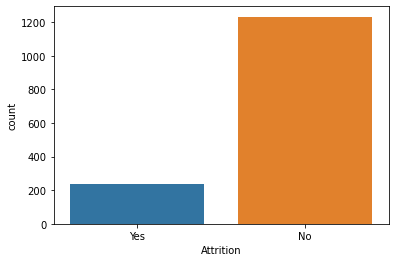

In [76]:
# lets visualise the no. of employees that stayed and left the company
sns.countplot(df['Attrition'])


from upper observation we can see the employees who left are less then the employees who are satayed in company.

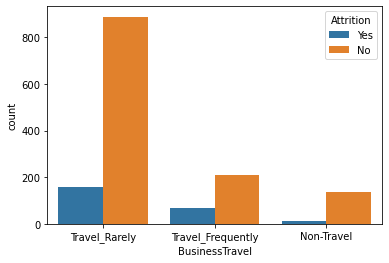

In [77]:
# Impact of Buisness Travel on Attrition
sns.countplot(hue =df['Attrition'],x=df['BusinessTravel'])
plt.show()

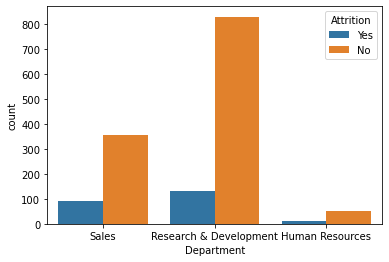

In [78]:
# Impact of department on Attrition
sns.countplot(hue =df['Attrition'],x=df['Department'])
plt.show()

.Reserch & Development have more no. of Attrition as compare to anothers departments.

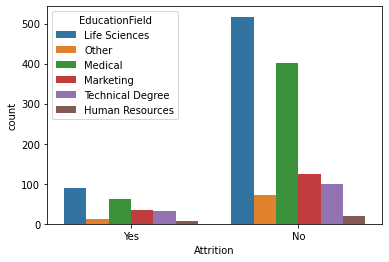

In [79]:
#Impact Attrition of educationalField
sns.countplot(x=df.Attrition,hue=df.EducationField)
plt.show()

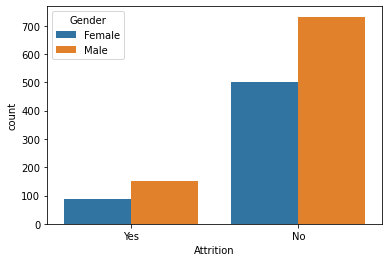

In [80]:
#Gender and Attrition
sns.countplot(x= df.Attrition,hue=df.Gender)
plt.show()

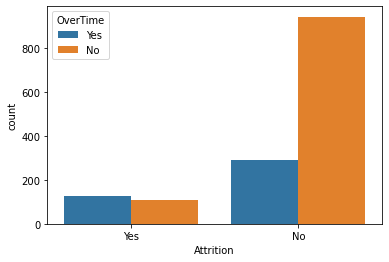

In [81]:
# Attrition and overtime
sns.countplot(x= df.Attrition,hue=df.OverTime)
plt.show()

Text(0.5, 0, 'JobRole')

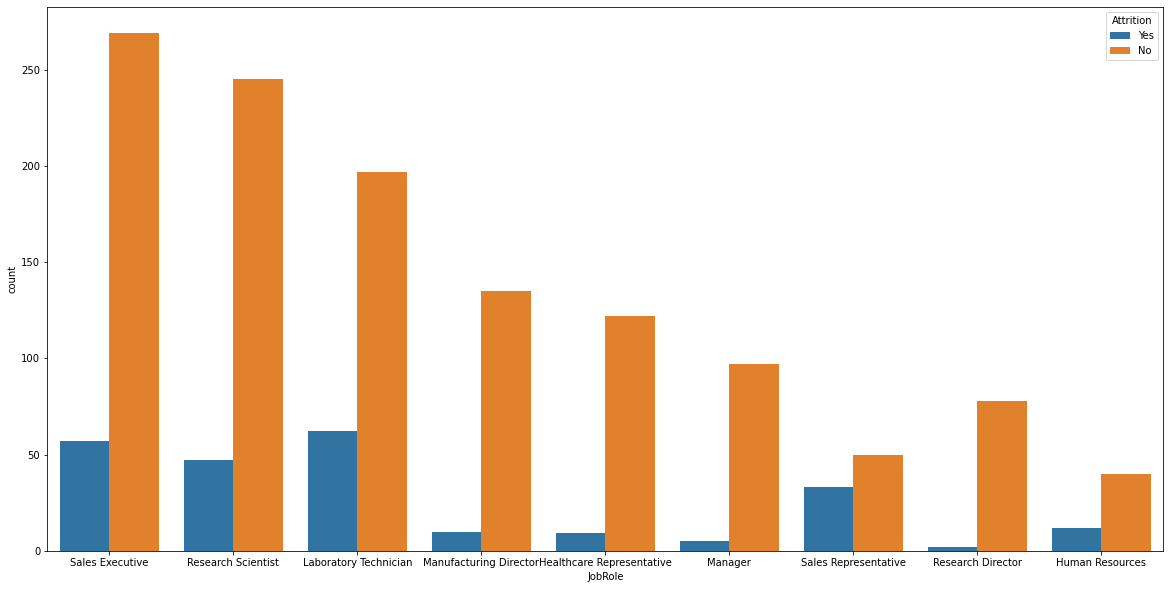

In [82]:
# Impact of job roles on Attrition
plt.figure(figsize=(20,10),facecolor='white')
sns.countplot(x='JobRole',hue='Attrition',data =df)
plt.xlabel('JobRole',fontsize=10)

### Analys Continous Data with Attrition:

In [83]:
numerical_col =[]
for column in df.columns:
    if df [column].dtype=='int64'and len (df[column].unique())>=10:
        
        numerical_col.append(column)

In [84]:
numerical_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

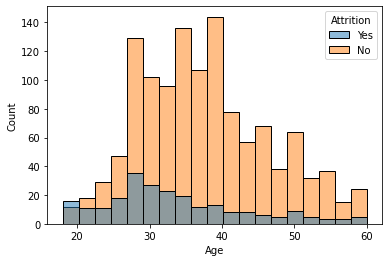

In [85]:
#Impact Age  on Attrition
sns.histplot(hue =df['Attrition'],x=df['Age'])
plt.show()

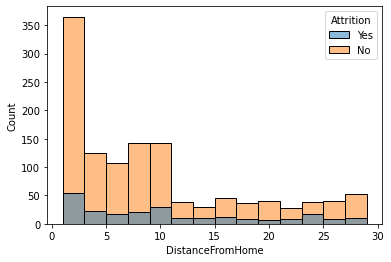

In [86]:
#distance from home and Attrition:
sns.histplot(hue=df.Attrition,x=df.DistanceFromHome)
plt.show()

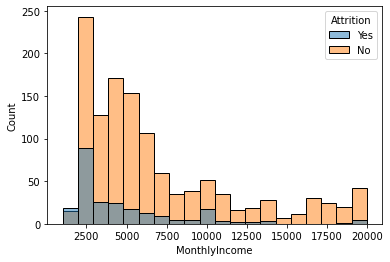

In [87]:
#how monthely income gives trends with Attrition
sns.histplot(x=df.MonthlyIncome,hue=df.Attrition)
plt.show()

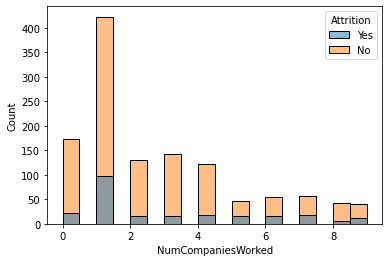

In [88]:
#Impact of no. of Compnies worked
sns.histplot(hue=df.Attrition,x=df.NumCompaniesWorked)
plt.show()

.Only that employees of emp=100 who wored with 1 company before have most Attrition(Attrition=yes)rest have similar data.

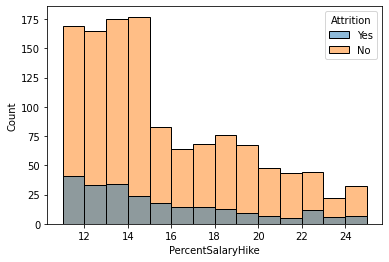

In [89]:
# how salary hike is impacting the Attrition
sns.histplot(hue=df.Attrition,x=df.PercentSalaryHike)
plt.show()

.Higher the salary percentage hike lesser the Attrition (no)

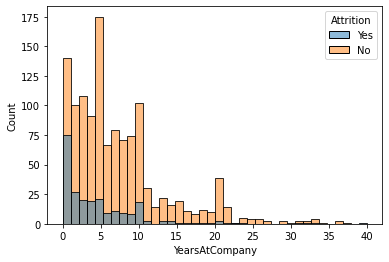

In [90]:
# Yers At the company
sns.histplot(x=df.YearsAtCompany,hue=df.Attrition)
plt.show()

### Analysis of descrete data with Attrition:

In [91]:
discrete_col = []
for column in df.columns:
    if df[column].dtype=='int64'and len(df[column].unique())<=10:
        discrete_col.append(column)

In [92]:
discrete_col

['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

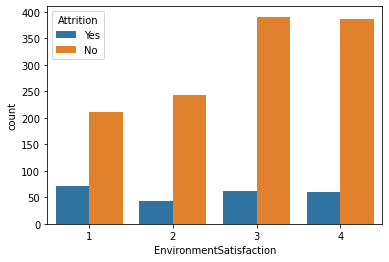

In [93]:
#Impact of Enviorment and Job Satisfication on Attriton:
sns.countplot(hue=df.Attrition,x=df.EnvironmentSatisfaction)
plt.show()

.increase in rate of Enviorment as well as job setisfaction givesrise to increse in Attrition (no).

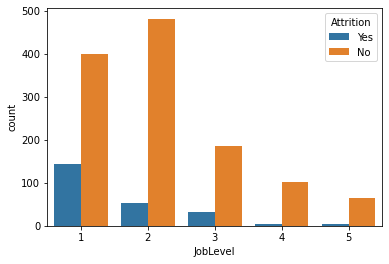

In [94]:
sns.countplot(hue =df['Attrition'],x=df['JobLevel'])
plt.show()

.increse in job level,Decrese in chances of leaving the company for Employees.

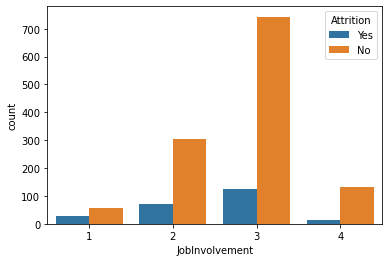

In [95]:
#Job Involvment impacting on Attrittion
sns.countplot(x=df.JobInvolvement,hue=df.Attrition)
plt.show()

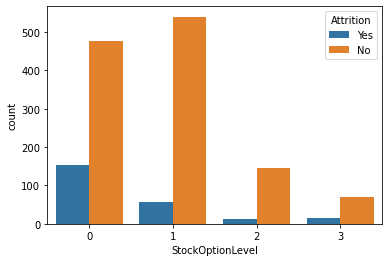

In [96]:
#impact of stock option level on Attrition
sns.countplot(x=df.StockOptionLevel,hue=df.Attrition)
plt.show()

.For the employees who are not having stock option are liely to quit.

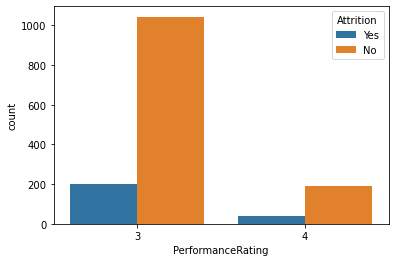

In [97]:
#Perfomence Rating And Attrition
sns.countplot(x=df.PerformanceRating,hue=df.Attrition)
plt.show()

employees having less perfomence rating are more likely to quit or we can say that company wants to fire that employees.

### Now Let's Handling Catagorical data:

In [98]:
df.Attrition=df.Attrition.map({'Yes':1,'No':0}) #using map function

In [99]:
df.Gender = pd.get_dummies(df.Gender,drop_first=True)

In [100]:
df.JobRole=df.JobRole.map({'Laboratory Technician':8,'Sales Executive':7,'Research Scientist':0,'Sales Representative':5,
                          'Human Resources':4,'Manufacturing Director':3,'Helthcare Representative':2,'Manager':1,'Research Director':0})

In [101]:
df.MaritalStatus=df.MaritalStatus.map({'Single':2,'Married':1,'Divorced':0})

In [102]:
df.OverTime=df.OverTime.map({"Yes":1,"No":0})

In [103]:
df.BusinessTravel=df.BusinessTravel.map({'Travel_Frequently':1,'Travel_Rarely':2,'Non_Travel':0})

In [104]:
df.Department=df.Department.map({'Research & Development':2,'Sales':1,'Human Resources':0})

In [105]:
df.EducationField=df.EducationField.map({'Life Sciences':5,'Other':4,'Medical':3,'Marketing':2,'Technical Degree':1,'Human Resources':0})

In [106]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,1,1,2,5,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1.0,279,2,8,1,5,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,2,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,2,3,4,5,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2.0,591,2,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


### Lets Droping some useless columns:

In [107]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18','BusinessTravel','JobRole'],axis =1,inplace =True)

In [108]:
df.head()

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,1,2,5,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,2,8,1,5,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,2,3,4,5,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   DailyRate                 1470 non-null   int64
 3   Department                1470 non-null   int64
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int64
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Gender                    1470 non-null   uint8
 9   HourlyRate                1470 non-null   int64
 10  JobInvolvement            1470 non-null   int64
 11  JobLevel                  1470 non-null   int64
 12  JobSatisfaction           1470 non-null   int64
 13  MaritalStatus             1470 non-null   int64
 14  MonthlyIncome             1470 non-null 

In [110]:
df

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,1,2,5,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,2,8,1,5,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,2,3,4,5,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,2,23,2,3,3,1,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,613,2,6,1,3,4,1,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,155,2,4,3,5,2,1,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1023,1,2,3,3,4,1,63,...,3,4,0,17,3,2,9,6,0,8


### Seprating the features and labels:

In [111]:
x = df.drop('Attrition',axis=1)
y = df['Attrition']

### Using StandardScalarization:

In [112]:
# using this methd for biasness
Scaler =StandardScaler()
x = pd.DataFrame(Scaler.fit_transform(x),columns = x.columns)
x

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,-1.074178,-1.010909,-0.891688,1.021863,-0.660531,-1.224745,1.383138,0.379672,...,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,0.684220,-0.147150,-1.868426,1.021863,0.254625,0.816497,-0.240677,-1.026167,...,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,0.684220,-0.887515,-0.891688,0.323194,1.169781,0.816497,1.284725,-1.026167,...,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,0.684220,-0.764121,1.061787,1.021863,1.169781,-1.224745,-0.486709,0.379672,...,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,0.684220,-0.887515,-1.868426,-0.375475,-1.575686,0.816497,-1.274014,0.379672,...,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,0.684220,1.703764,-0.891688,-0.375475,0.254625,0.816497,-1.224807,1.785511,...,-0.426230,0.266233,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873
1466,0.227347,-0.469754,0.684220,-0.393938,-1.868426,-0.375475,1.169781,0.816497,-1.175601,-1.026167,...,-0.426230,-1.584178,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541
1467,-1.086676,-1.605183,0.684220,-0.640727,0.085049,1.021863,-0.660531,0.816497,1.038693,1.785511,...,2.346151,-0.658973,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873
1468,1.322365,0.546677,-1.074178,-0.887515,0.085049,-0.375475,1.169781,0.816497,-0.142264,-1.026167,...,-0.426230,1.191438,-0.932014,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895


In [113]:
#lets check the y counts
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [114]:
#oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [115]:
y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

### Testing & Spliting

In [116]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state =42)

In [117]:
from sklearn.metrics  import confusion_matrix,classification_report,accuracy_score

In [118]:
def metric_score(clf, x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n==========Train Result=========")
        
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100: .2f}%")
        
    
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n=========Train Result========")
        
        print(f"Accuracy Score: {accuracy_score(y_test, pred)*100: .2f}%")
        
        print('\n \n Test Cassification Report \n',classification_report(y_test,pred,digits=2))

### Model Training:

In [120]:
#for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [121]:
Dec = DecisionTreeClassifier()
Dec.fit(x_train,y_train)

DecisionTreeClassifier()

In [122]:
metric_score(Dec,x_train,x_test,y_train,y_test,train=True)

metric_score(Dec,x_train,x_test,y_train,y_test,train=False)


==========Train Result=========
Accuracy Score:  100.00%

=========Train Result========
Accuracy Score:  81.85%

 
 Test Cassification Report 
               precision    recall  f1-score   support

           0       0.84      0.79      0.82       311
           1       0.80      0.84      0.82       306

    accuracy                           0.82       617
   macro avg       0.82      0.82      0.82       617
weighted avg       0.82      0.82      0.82       617



In [123]:
# for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [124]:
RFR = RandomForestClassifier()
RFR.fit(x_train,y_train)

RandomForestClassifier()

In [125]:
metric_score(RFR,x_train,x_test,y_train,y_test,train=True)
metric_score(RFR,x_train,x_test,y_train,y_test,train=False)


==========Train Result=========
Accuracy Score:  100.00%

=========Train Result========
Accuracy Score:  91.90%

 
 Test Cassification Report 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       311
           1       0.95      0.88      0.91       306

    accuracy                           0.92       617
   macro avg       0.92      0.92      0.92       617
weighted avg       0.92      0.92      0.92       617



In [126]:
# for AdaBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [127]:
Adb = AdaBoostClassifier()
Adb.fit(x_train,y_train)

AdaBoostClassifier()

In [128]:
metric_score(Adb,x_train,x_test,y_train,y_test,train=True)
metric_score(Adb,x_train,x_test,y_train,y_test,train=False)


==========Train Result=========
Accuracy Score:  92.00%

=========Train Result========
Accuracy Score:  85.90%

 
 Test Cassification Report 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       311
           1       0.86      0.86      0.86       306

    accuracy                           0.86       617
   macro avg       0.86      0.86      0.86       617
weighted avg       0.86      0.86      0.86       617



In [129]:
# for GradientbosstingClaasifier
from sklearn.ensemble import GradientBoostingClassifier

In [130]:
Grb =GradientBoostingClassifier ()
Grb.fit(x_train,y_train)

GradientBoostingClassifier()

In [131]:
metric_score(Grb,x_train,x_test,y_train,y_test,train=True)
metric_score(Grb,x_train,x_test,y_train,y_test,train=False)


==========Train Result=========
Accuracy Score:  96.97%

=========Train Result========
Accuracy Score:  90.44%

 
 Test Cassification Report 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       311
           1       0.94      0.87      0.90       306

    accuracy                           0.90       617
   macro avg       0.91      0.90      0.90       617
weighted avg       0.91      0.90      0.90       617



# Cross-val-Score:

In [132]:
from sklearn.model_selection import cross_val_score

In [133]:
#checkig cv score for DecisionTreeClassifier
score = cross_val_score(Dec,x,y)
print(score)
print(score.mean())

[0.74291498 0.89046653 0.87221095 0.88640974 0.88640974]
0.8556823874321472


In [134]:
#checkig cv score for RandomForestClassifier
score = cross_val_score(RFR,x,y)
print(score)
print(score.mean())

[0.75303644 0.97363083 0.96957404 0.97565923 0.97565923]
0.9295119527637944


In [135]:
# checking cv score for AdaBoostClassifier
score = cross_val_score(Adb,x,y)
print(score)
print(score.mean())

[0.61336032 0.93711968 0.93103448 0.92697769 0.94726166]
0.8711507666028856


In [136]:
# checking cv score for GradientBoostingClassifier
score = cross_val_score(Grb,x,y)
print(score)
print(score.mean())

[0.58097166 0.95334686 0.96551724 0.95740365 0.97565923]
0.8865797275213311


I will choose RandomForestClassifier as my best model due to very least difference b/w cross-val-scoe and r2score.

### HyperTunning Parameters:

In [137]:
#  RandomForestClassifier:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'max_depth':[2,8,],
              'max_features':[0.2,0.6,1.0],
              'n_estimators':[20,60,100,120],
              'max_samples':[0.5,0.75,1.0],
              'criterion':['gini','entropy'],
              'bootstrap':[True,False]}

In [138]:
RFR=  RandomizedSearchCV(RandomForestClassifier(),parameters,cv= 5)

In [139]:
RFR.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 8],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'n_estimators': [20, 60, 100, 120]})

In [140]:
RFR.best_params_

{'n_estimators': 100,
 'max_samples': 1.0,
 'max_features': 1.0,
 'max_depth': 8,
 'criterion': 'gini',
 'bootstrap': True}

In [143]:
RFR.best_score_

0.9091364535266975

In [141]:
Final_model = RandomForestClassifier(n_estimators = 100,max_samples= 1.0, max_features= 1.0,max_depth= 8,criterion= 'gini',bootstrap='True')
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

88.81685575364668


### Saving My Model:

In [144]:
# we use joblib methode for save the model
import joblib
joblib.dump(Final_model,"HR Attrition")

['HR Attrition']

In [145]:
# load the saved model
model = joblib.load("HR Attrition")

#pediction
prediction = model.predict(x_test)
prediction

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,